# Import e Conhecendo os dados

In [17]:
# Importação das bibliotecas
#from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


from scipy import stats

In [7]:
# Upload dos dados
df = pd.read_csv('Walmart 2.csv')


In [9]:
# Preview da qualidade dos dados
df.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








In [22]:
# Verifique as vendas semanais por loja
df_group = df.groupby('Store').agg({'Weekly_Sales':'sum'}).reset_index()
df_group.sort_values(by='Weekly_Sales', ascending=False)

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [26]:
# Verifique se as vendas em período de feriado tem uma variação maior que as vendas em períodos normais

df_holiday = df.groupby('Holiday_Flag').agg({'Weekly_Sales':'sum'}).reset_index()
df_holiday.sort_values(by='Weekly_Sales', ascending=False)


,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


In [28]:
# Ver a variabilidade das vendas por loja usando o holiday_flag 
# Criando grafico de boxplot para verificar a variabilidade das vendas por loja usando o holiday_flag
fig = px.box(df, x="Holiday_Flag", y="Weekly_Sales", color="Holiday_Flag")
fig.show()




#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




In [33]:
# Amostra Simples Aleatória
# Criando uma amostra simples aleatória de 100 registros
df_sample = df.sample(n=100, random_state=1)
df_sample.head(10)



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
447,4,11-06-2010,1870619.23,0,78.45,2.668,126.111903,7.896
2196,16,28-01-2011,448391.99,0,20.80,3.008,191.667891,6.614
3253,23,24-02-2012,1272948.27,0,31.12,3.751,137.341103,4.261
2873,21,07-05-2010,744969.42,0,70.87,2.835,210.001102,8.200
712,5,12-10-2012,325345.41,0,66.24,3.601,223.974787,5.422
2852,20,07-09-2012,2080529.06,1,76.36,3.911,215.218957,7.280
1165,9,02-07-2010,528832.54,0,78.55,2.669,214.776503,6.442
2202,16,11-03-2011,457504.35,0,29.36,3.372,192.058484,6.614
3140,22,21-09-2012,921612.53,0,63.38,4.056,142.679817,7.753
2804,20,07-10-2011,2135982.79,0,52.42,3.583,210.117060,7.082


In [34]:
# Amostra sistemática
# Criando uma amostra sistemática de 100 registros
df_sample = df.iloc[range(0, len(df), 10)]
df_sample.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
10,1,16-04-2010,1466058.28,0,66.32,2.808,210.488700,7.808
20,1,25-06-2010,1422711.60,0,84.34,2.653,211.338653,7.808
30,1,03-09-2010,1540163.53,0,81.21,2.577,211.531248,7.787
40,1,12-11-2010,1494479.49,0,59.61,2.728,212.003944,7.838
50,1,21-01-2011,1327405.42,0,44.04,3.016,211.827234,7.742
60,1,01-04-2011,1495064.75,0,59.17,3.524,214.837166,7.682
70,1,10-06-2011,1588948.32,0,83.13,3.648,215.043523,7.682
80,1,19-08-2011,1530761.43,0,89.94,3.554,215.669311,7.962
90,1,28-10-2011,1445249.09,0,66.57,3.372,217.676679,7.866


In [40]:
# Amostra estratificada
# Criando uma amostra estratificada de 100 registros utilizando a variável holiday_flag
df_extra = df.groupby('Holiday_Flag', group_keys=False).apply(lambda x: x.sample(min(len(x), 100)))
df_extra.tail(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3097,22,25-11-2011,1535857.49,1,46.28,3.536,140.421786,7.706
3955,28,25-11-2011,1929738.27,1,53.25,3.622,129.836400,12.890
1318,10,10-09-2010,1720530.23,1,84.04,2.961,126.114581,9.199
963,7,10-02-2012,563460.77,1,18.79,3.103,196.919506,8.256
2800,20,09-09-2011,2050542.56,1,68.74,3.738,209.022556,7.274
1381,10,25-11-2011,2950198.64,1,60.68,3.760,129.836400,7.874
4863,35,12-02-2010,1168815.31,1,29.81,2.773,135.411308,9.262
5231,37,09-09-2011,506273.74,1,77.94,3.546,214.615538,8.177
1810,13,25-11-2011,2864170.61,1,38.89,3.445,129.836400,6.392
1197,9,11-02-2011,555279.02,1,34.13,3.022,216.496729,6.416


In [48]:
# Amostra Clusterizada
# Criando uma amostra clusterizada de 100 registros utilizando a variável Store
# utilizando trin_test_split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5, random_state=1, stratify=df['Store'])
df_train.head(10)




,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Cluster
3181,23,08-10-2010,1179851.68,0,50.75,2.776,132.751667,5.287,0
3772,27,18-02-2011,1709365.19,0,39.32,3.420,137.251185,7.827,0
1588,12,21-05-2010,958374.56,0,76.20,3.120,126.184387,14.099,9
2932,21,24-06-2011,771298.98,0,85.72,3.594,214.744111,7.931,6
784,6,03-06-2011,1705506.29,0,84.01,3.699,216.819252,6.855,1
3205,23,25-03-2011,1148624.83,0,29.11,3.624,133.958742,5.114,0
5840,41,25-05-2012,1424500.47,0,54.89,3.804,197.588605,6.547,7
1556,11,06-07-2012,1461129.94,0,83.44,3.227,225.391625,6.334,9
731,6,28-05-2010,1644470.66,0,78.89,2.759,212.412888,7.092,1
2522,18,04-11-2011,1100625.06,0,38.29,3.586,136.475129,8.471,6


#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [ ]:
# Todos os dados possíveis


In [ ]:
# Boxplot das vendas semanais por loja


In [ ]:
# Distribuição das vendas semanais da loja 20


In [ ]:
# Verificando se as vendas em período de feriado tem uma variação maior


# Etapa 02

## Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state


In [ ]:
# Amostrando simples usando o seed


In [ ]:
# Quantidade de classes distintas na amostra


## Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos



## Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra


In [ ]:


# Amostragem estratificada usando train_test_split


## Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

/tmp/ipykernel_52243/1488550288.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




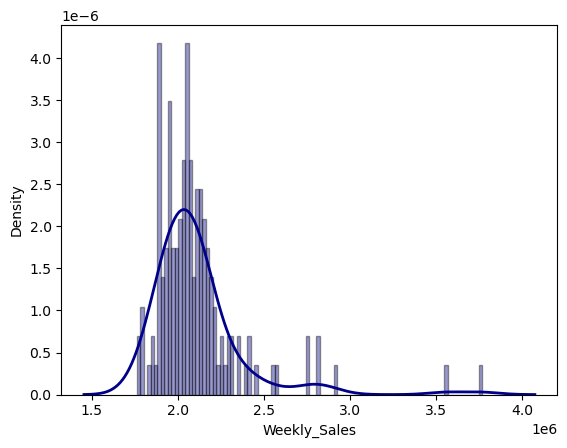

In [51]:
# Filtrando o dataset e vendo seu histograma
# Analisando a distribuição das vendas semanais da loja 20
# usando o método hist do pandas com linha
df_store_20 = df[df['Store'] == 20]
sns.distplot(df_store_20['Weekly_Sales'], hist=True, kde=True, bins=100, color = 'darkblue',
                hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2});

            

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





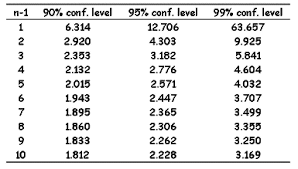

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [63]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
# Criando uma amostra aleatória simples de 25 registros
# com intervalo de confiança de 95%
amostra = df.Weekly_Sales.sample(n=25, random_state=1)
# calcular a média da amostra
media_amostra = amostra.mean()
# calcular o desvio padrão da amostra
desvio_padrao_amostra = amostra.std()
# calcular o valor crítico para um intervalo de confiança de 95%
valor_critico = 1.96
# calcular o erro padrão da média
erro_padrao_media = desvio_padrao_amostra / (25 ** 0.5)
# calcular o limite inferior e o limite superior do intervalo de confiança
limite_inferior = media_amostra - (valor_critico * erro_padrao_media)
limite_superior = media_amostra + (valor_critico * erro_padrao_media)
limites = [limite_inferior, limite_superior]
limites


[799201.7028762796, 1298728.18992372]

In [ ]:
# Verificando a média da população
media_populacao = df['Weekly_Sales'].mean()


/tmp/ipykernel_52243/67290696.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




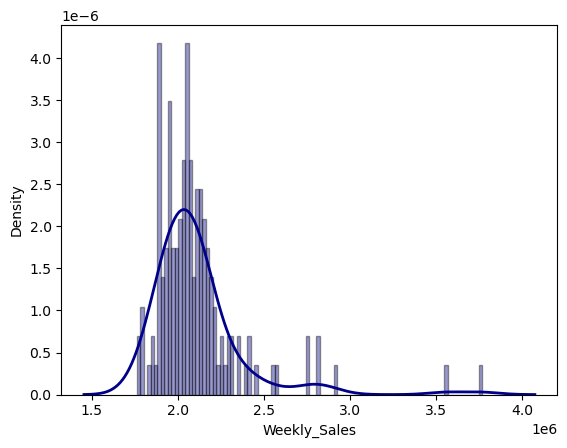

In [59]:
# Visualizando a distribuição dos dados como ele são
df_store_20 = df[df['Store'] == 20]
sns.distplot(df_store_20['Weekly_Sales'], hist=True, kde=True, bins=100, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2});



/tmp/ipykernel_52243/2580720788.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




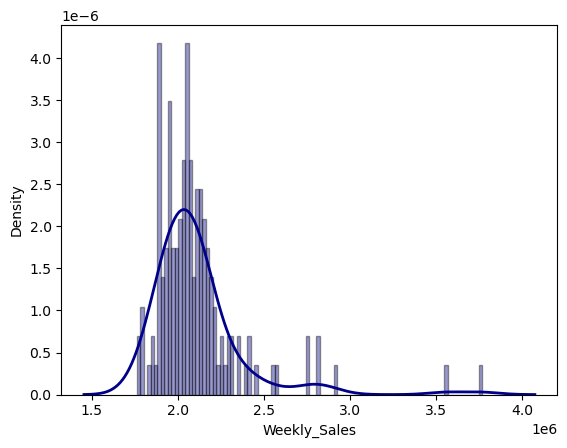

In [60]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central




In [62]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal
# Criando uma amostra aleatória simples de 50 registros
# com intervalo de confiança de 95%
amostra = df.Weekly_Sales.sample(n=50, random_state=1)
# calcular a média da amostra
media_amostra = amostra.mean()
# calcular o desvio padrão da amostra
desvio_padrao_amostra = amostra.std()
# calcular o valor crítico para um intervalo de confiança de 95%
valor_critico = 1.96
# calcular o erro padrão da média
erro_padrao_media = desvio_padrao_amostra / (50 ** 0.5)
# calcular o limite inferior e o limite superior do intervalo de confiança
limite_inferior = media_amostra - (valor_critico * erro_padrao_media)
limite_superior = media_amostra + (valor_critico * erro_padrao_media)
limites = [limite_inferior, limite_superior]
limites



[936891.2601746786, 1272195.6810253211]

In [ ]:
# Verificando a média da população
